## Train baseline models

In [1]:
# import required libraries

import pandas as pd
import numpy as np 

# baseline models 
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# metrics 
from sklearn.metrics import classification_report, confusion_matrix, auc, roc_auc_score, precision_recall_curve

# visualisation 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid')

In [2]:
# load the balanced data (SMOTE)

from pathlib import Path

DATA_DIR = Path('../data/processed/')

# Load SMOTE balanced training set
X_train = pd.read_parquet(DATA_DIR / 'X_train_balanced_smote.parquet')
y_train = pd.read_parquet(DATA_DIR / 'y_train_balanced_smote.parquet').squeeze()

# Load validation and test sets (already scaled)
X_val = pd.read_parquet(DATA_DIR / 'X_val.parquet')
y_val = pd.read_parquet(DATA_DIR / 'y_val.parquet').squeeze()
X_test = pd.read_parquet(DATA_DIR / 'X_test.parquet')
y_test = pd.read_parquet(DATA_DIR / 'y_test.parquet').squeeze()

print("Training shape:", X_train.shape)
print("Validation shape:", X_val.shape)
print("Test shape:", X_test.shape)

Training shape: (398040, 30)
Validation shape: (42721, 30)
Test shape: (42722, 30)


In [3]:
# helper function to evaluate the models 

def evaluate_model(model, X_val, y_val):
  y_pred = model.predict(X_val)
  y_proba = model.predict_proba(X_val)[:,1]

  print("Classification Report: \n", classification_report(y_val, y_pred, digits=4))
  print("Confusion Matrix: \n", confusion_matrix(y_val, y_pred))


  roc = roc_auc_score(y_val, y_proba)
  precision, recall, _ = precision_recall_curve(y_val, y_proba)
  pr_auc = auc(recall, precision)

  print(f"ROC-AUC: {roc:.4f}")
  print(f"PR-AUC: {pr_auc:.4f}")

  # plot the precision-recall curve 

  plt.figure(figsize=(6,4))
  plt.plot(recall, precision, label=f'PR curve (AUC={pr_auc:.4f})')
  plt.xlabel("Recall")
  plt.ylabel("Precision")
  plt.title("Precision-Recall Curve")
  plt.legend()
  plt.show()

### Logistic Regression

In [4]:
lr = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42)
lr.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)

Logistic regression on validation set
Classification Report: 
               precision    recall  f1-score   support

           0     0.9998    0.9782    0.9889     42647
           1     0.0654    0.8784    0.1217        74

    accuracy                         0.9780     42721
   macro avg     0.5326    0.9283    0.5553     42721
weighted avg     0.9982    0.9780    0.9874     42721

Confusion Matrix: 
 [[41718   929]
 [    9    65]]
ROC-AUC: 0.9669
PR-AUC: 0.6859


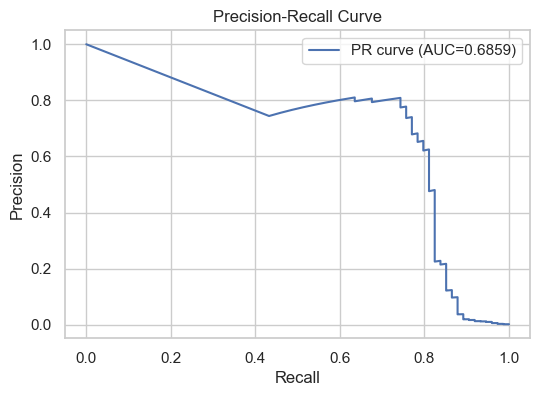

In [5]:
print("Logistic regression on validation set")
evaluate_model(lr, X_val, y_val)

### Decision tree

In [6]:
dt = DecisionTreeClassifier(max_depth=5, class_weight='balanced', random_state=42)
dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=5, random_state=42)

Decision Tree on validation set
Classification Report: 
               precision    recall  f1-score   support

           0     0.9997    0.9709    0.9851     42647
           1     0.0484    0.8514    0.0916        74

    accuracy                         0.9707     42721
   macro avg     0.5241    0.9111    0.5384     42721
weighted avg     0.9981    0.9707    0.9836     42721

Confusion Matrix: 
 [[41408  1239]
 [   11    63]]
ROC-AUC: 0.9530
PR-AUC: 0.4402


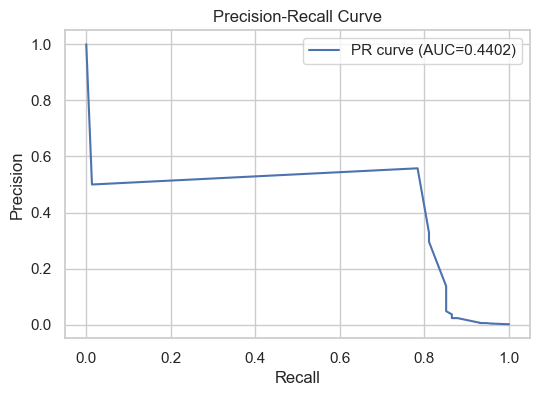

In [7]:
print("Decision Tree on validation set")
evaluate_model(dt, X_val, y_val)

### Random Forest Model

In [8]:
rf = RandomForestClassifier(
  n_estimators=1000,
  max_depth=7,
  class_weight='balanced',
  random_state=42,
  n_jobs=-1
)

rf.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=7, n_estimators=1000,
                       n_jobs=-1, random_state=42)

Random forest on validation set


Classification Report: 
               precision    recall  f1-score   support

           0     0.9997    0.9970    0.9983     42647
           1     0.3158    0.8108    0.4545        74

    accuracy                         0.9966     42721
   macro avg     0.6577    0.9039    0.7264     42721
weighted avg     0.9985    0.9966    0.9974     42721

Confusion Matrix: 
 [[42517   130]
 [   14    60]]
ROC-AUC: 0.9787
PR-AUC: 0.6806


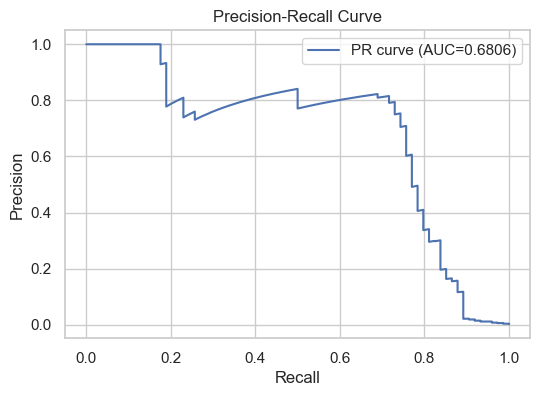

In [9]:
print("Random forest on validation set")
evaluate_model(rf, X_val, y_val)